# Projeto para reconhecimento do estágio de desenvolvimento de Culturas de Soja

Esse projeto foi desenvolvido para disciplina de Deep Learning, e o objetivo é utilizar o TensorFlow/Keras para reconhecer o estágio de desenvolvimento de plantações de soja, tomando como base um conjunto de imagens ilustrativas fornecidas pela Bayer. A maior parte do código foi baseada no vídeo que se encontra no link: https://www.youtube.com/watch?v=jztwpsIzEGc

# 0. Criando a base de validação

In [3]:
# Caminhos para as pastas de treino e teste
import os

train_dir = os.path.join('data', 'TRN')
test_dir = os.path.join('data', 'TST')

In [4]:
val_dir = os.path.join('data', 'VAL')
os.makedirs(val_dir, exist_ok=True)

for i in range(1,9):
    os.makedirs(os.path.join(val_dir, str(i)), exist_ok=True)

In [5]:
files_train = os.listdir(os.path.join(train_dir, '1'));
len(files_train)

1638

In [6]:
files_test = os.listdir(os.path.join(test_dir, '1'));
len(files_test)

819

In [7]:
files_val = os.listdir(os.path.join(val_dir, '1'));
len(files_val)

273

In [8]:
length_files_train = len(files_train)
length_files_teste = len(files_test)
length_files_val = len(files_val)

In [231]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(train_dir, str(i))))
    print(f'TRN/{i} : {size}')

TRN/1 : 1312
TRN/2 : 1312
TRN/3 : 1312
TRN/4 : 1312
TRN/5 : 1312
TRN/6 : 1312
TRN/7 : 1312
TRN/8 : 1312


In [233]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(test_dir, str(i))))
    print(f'TST/{i} : {size}')

TST/1 : 657
TST/2 : 657
TST/3 : 657
TST/4 : 657
TST/5 : 657
TST/6 : 657
TST/7 : 657
TST/8 : 657


In [235]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(val_dir, str(i))))
    print(f'VAL/{i} : {size}')

VAL/1 : 761
VAL/2 : 761
VAL/3 : 761
VAL/4 : 761
VAL/5 : 761
VAL/6 : 761
VAL/7 : 761
VAL/8 : 761


In [229]:
'''
import os
import shutil
import random

# Para cada categoria, pegar um número específico de imagens para validação
categories = os.listdir(train_dir)

for category in ['1', '2', '3', '4', '5', '6', '7', '8']:
    # Caminhos para as categorias de treino e teste
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    
    # Listar as imagens de cada categoria
    train_images = os.listdir(train_category_dir)
    test_images = os.listdir(test_category_dir)

    # Pegar as 50 primeiras imagens de treino e 100 imagens de teste
    val_train_images = random.sample(train_images, int(0.1*length_files_train))
    val_test_images = random.sample(test_images, int(0.1*length_files_teste))

    # Embaralhar as imagens para garantir aleatoriedade
    val_images = val_train_images + val_test_images
    random.shuffle(val_images)

    # Criar a pasta de validação da categoria, se não existir
    val_category_dir = os.path.join(val_dir, category)
    os.makedirs(val_category_dir, exist_ok=True)

    # Mover as imagens de treino e teste para a pasta de validação
    for image in val_images:
        # Caminho completo da imagem
        if image in val_train_images:
            src = os.path.join(train_category_dir, image)
        else:
            src = os.path.join(test_category_dir, image)
        
        dst = os.path.join(val_category_dir, image)
        
        # Mover para a pasta de validação
        shutil.move(src, dst)

print("Conjunto de validação criado com sucesso!")
'''

Conjunto de validação criado com sucesso!


# 1. Configurações Básicas

In [14]:
!pip install tensorflow opencv-python matplotlib

In [15]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-pro

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [18]:
tf.config.list_physical_devices('GPU') # Por enquanto, minha GPU não está sendo detectada. Vou tentar fazer sem mesmo

[]

# 2. Importando e tratando as imagens

In [20]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.utils import to_categorical
import cv2

CONTRAST_ADJUST = 2
MAX_RGB = 255*CONTRAST_ADJUST

data_dir = 'data' 

In [21]:
# Função personalizada para converter RGB para HSV e ajustar o contraste
def rgb_to_hsv(image, label):
    # Converter RGB para HSV
    hsv_image = tf.image.rgb_to_hsv(image)
    
    return hsv_image, label

In [22]:
import cv2
import numpy as np
import tensorflow as tf

def enhance(image, label, green_factor=2):
    return image, label


In [23]:
def preprocess_labels(image, label):
    label_one_hot = to_categorical(label, num_classes=8)
    return image, label_one_hot

In [24]:
# Função para normalizar a imagem (para a faixa [0, 1])
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalizar após ajuste de contraste
    return image, label

In [25]:
# Carregar os dados de treino
data_train = tf.keras.utils.image_dataset_from_directory(
    'data/TRN',
    image_size=(256, 256),
    batch_size=32
)

data_train_without_augmentation = data_train

# Definindo camadas de Data Augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.4),
    RandomZoom(0.4)
])

# data_train = data_train.map(enhance)                                                                # Ajustar o contraste
data_train = data_train.map(normalize)                                                              # Normalizar depois do ajuste
data_train = data_train.map(lambda x, y: (data_augmentation(x, training=True), y))                  # Data augmentation
#data_train = data_train.shuffle(buffer_size=100, reshuffle_each_iteration=True)                     # Embaralhar os dados
data_train = data_train.cache()                                                                     # Cache de dados
data_train = data_train.map(preprocess_labels).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # OneHotEncoding e prefetch

Found 13104 files belonging to 8 classes.


In [26]:
# Definindo uma pipeline para importar as imagens (assim não precisam ser todas salvas em memória de uma vez)

data_test = tf.keras.utils.image_dataset_from_directory(
    'data/TST',
    image_size=(256, 256),
    batch_size=32
)

# Aplicando o pipeline no dataset de teste
#data_test = data_test.map(adjust_contrast)                                                       # Ajustando o contraste
data_test = data_test.map(normalize)                                                             # Normalizando a escala RGB após ajuste de contraste
# data_test = data_test.map(rgb_to_hsv)                                                          # Usando HSV ao invés de RGB (opcional)
data_test = data_test.cache()                                                                    # Cache de dados para otimização
data_test = data_test.map(preprocess_labels).prefetch(buffer_size=tf.data.experimental.AUTOTUNE) # OneHotEnconding e prefetch

Found 6552 files belonging to 8 classes.


In [27]:
data_val = tf.keras.utils.image_dataset_from_directory(
    'data/VAL',
    image_size=(256, 256),
    batch_size=32
)

# Aplicando o pipeline no dataset de validação
#data_val = data_val.map(adjust_contrast)                                                         # Ajustando o contraste
data_val = data_val.map(normalize)                                                               # Normalizando a escala RGB após ajuste de contraste
# data_val = data_val.map(rgb_to_hsv)                                                            # Usando HSV ao invés de RGB (opcional)
data_val = data_val.cache()                                                                      # Cache de dados
data_val = data_val.map(preprocess_labels).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)   # OneHotEncondig e prefetch

Found 2184 files belonging to 8 classes.


In [28]:
# Definindo um iterator para cada pipeline. 
# Esses objetos serão usados para "puxar" um batch novo de imagens para memória sempre que necessário

data_train_iterator = data_train.as_numpy_iterator()
data_test_iterator = data_test.as_numpy_iterator()
data_val_iterator = data_val.as_numpy_iterator()

In [29]:
batch_train = data_train_iterator.next()

In [30]:
print(f'Os valores estão entre {batch_train[0].min()} e {batch_train[0].max()}')

Os valores estão entre 9.270370355807245e-05 e 0.9983829259872437


In [31]:
# O batch é um tupla formada por uma lista de valores 
# (que são as imagens importadas em memória no formato de uma lista de listas com três elementos - cores BGR - do NumPy) 
# E uma lista de rótulos, que se referem a pasta (e futuramente, classificação) da imagem

# As cores estão no formato BGR porque esse é o padrão do NumPy, o que exige uma conversão posterior (geralmente)

print(batch_train[0]) # matrizes NumPy que representam as imagens

[[[[0.05229559 0.26149905 0.02214897]
   [0.06659993 0.25539982 0.02976604]
   [0.07076212 0.25806788 0.03525574]
   ...
   [0.05128835 0.17053773 0.01506556]
   [0.0515805  0.19499692 0.01335672]
   [0.06003439 0.22541867 0.01911561]]

  [[0.05057325 0.20571552 0.01853137]
   [0.07152271 0.22425854 0.03310769]
   [0.08621855 0.25461876 0.04546817]
   ...
   [0.06043195 0.1733062  0.01913894]
   [0.06462543 0.17154089 0.02064736]
   [0.06815765 0.15305594 0.0233309 ]]

  [[0.04840261 0.278464   0.01704984]
   [0.06252281 0.3002379  0.02759663]
   [0.07170796 0.32417896 0.03576329]
   ...
   [0.07480301 0.19726254 0.02828501]
   [0.08901703 0.18475838 0.0365397 ]
   [0.08943578 0.1520622  0.03682398]]

  ...

  [[0.27982897 0.24168384 0.17219166]
   [0.323245   0.2831443  0.20240703]
   [0.36681965 0.3233271  0.23422335]
   ...
   [0.67731917 0.6042658  0.4656375 ]
   [0.66684175 0.62680995 0.45575675]
   [0.5946785  0.62212676 0.39649284]]

  [[0.32812887 0.28578427 0.22719449]
   [0.3

In [32]:
# rótulos que representam as categorias em OneHotEncoding 
# (ou seja, cada uma é uma lista com zeros e ums, que representa o número referente à categoria - de 0 7 - )

print(batch_train[1]) 

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [33]:
# Podemos converter os labels de OntHotEncondig para números normais, e ver as categorias de cada imagem do batch normalmente
# (lembrando que o batch tem 32 imagens, por isso 32 valores na lista)

one_hot_labels = batch_train[1]
class_labels = np.argmax(one_hot_labels, axis=1)
class_labels

array([3, 5, 3, 4, 3, 5, 5, 1, 2, 0, 7, 7, 3, 3, 4, 0, 4, 4, 2, 5, 6, 3,
       6, 2, 5, 1, 6, 6, 3, 4, 7, 4], dtype=int64)

In [34]:
len(batch_train[0]) # cada batch importa 32 imagens 

32

In [35]:
print(batch_train[0][0][0][0]) # um pixel (com as regularização, seus valores estarão entre 0 e 1)

[0.05229559 0.26149905 0.02214897]


In [36]:
print(255*batch_train[0][0][0][0]) # um pixel com os valores entre 0 e 255

[13.335376  66.68226    5.6479864]


In [37]:
len(batch_train[0][0][0]) # uma linha de pixels da imagem

256

In [38]:
len(batch_train[0][0]) # uma lista de linhas - ou seja, a imagem

256

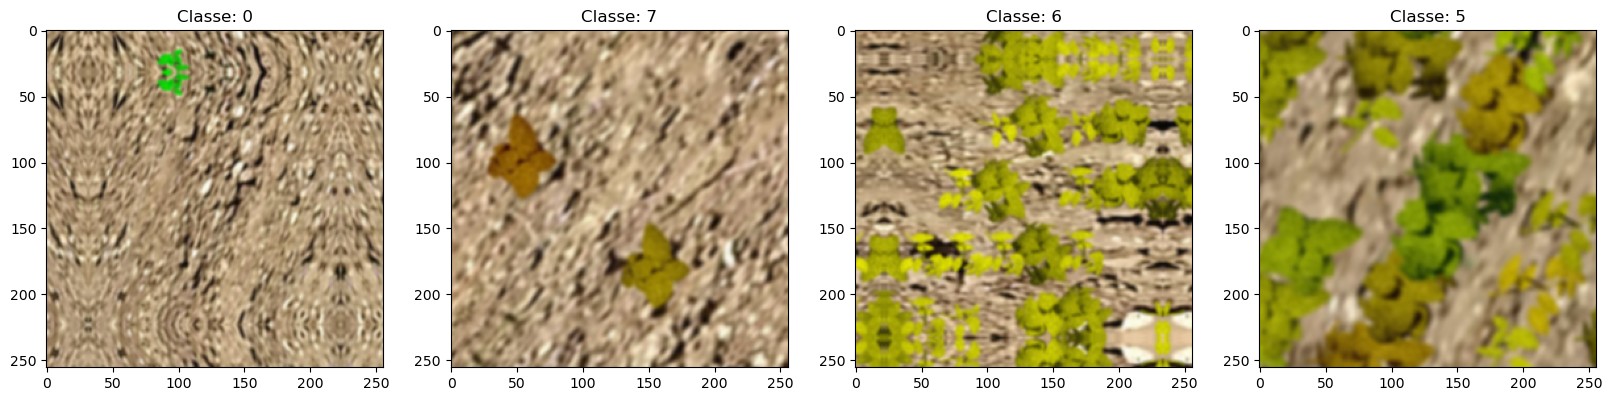

In [39]:
batch_train = data_train_iterator.next()

ig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_train[0][:4]):
    # Exibindo a imagem
    ax[idx].imshow((255*img).astype(int))
    
    # Convertendo One-Hot para número
    label_number = tf.argmax(batch_train[1][idx]).numpy()  # Converte a posição da classe para um número
    
    # Definindo o título com o número da classe
    ax[idx].title.set_text(f"Classe: {label_number}")

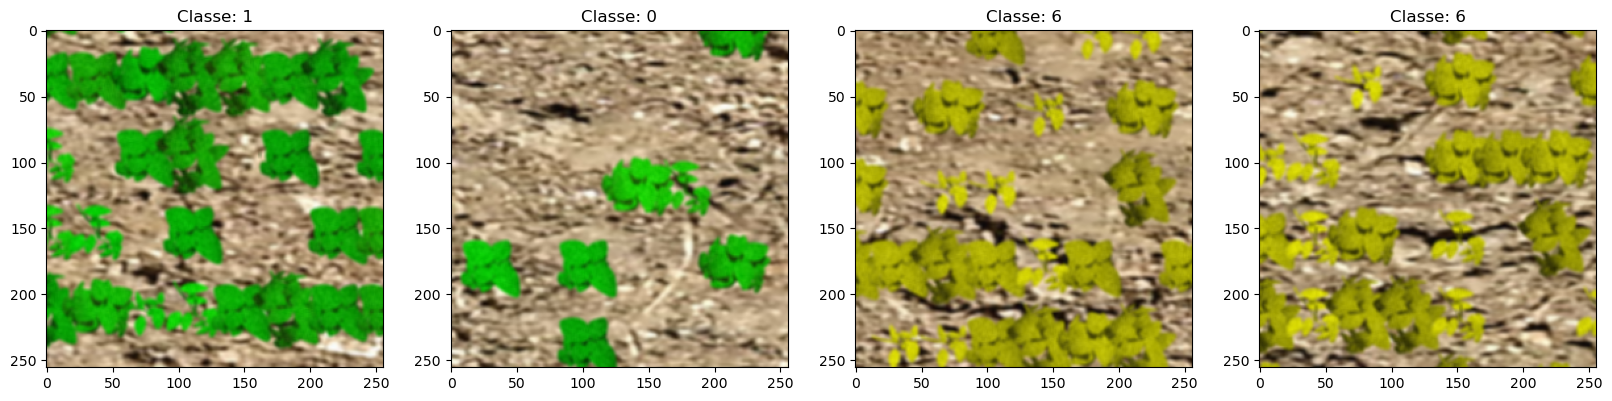

In [40]:
# Para comparação, vamos ver as imagens plotadas sem data augmentation

batch_without_augmentation = data_train_without_augmentation.map(lambda x,y: (x/255, y)).as_numpy_iterator().next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_without_augmentation[0][:4]):
    ax[idx].imshow((255*img).astype(int))
    ax[idx].title.set_text(f"Classe: {batch_without_augmentation[1][idx]}")

# 3. Construindo o Modelo de Deep Learning

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation

In [43]:
# Arquitetura 2

'''
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25)) 

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  

model.add(Dense(8, activation='softmax'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.25)) \n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.25))  \n\nmodel.add(Conv2D(16, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dropout(0.5))  \n\nmodel.add(Dense(8, activation='softmax'))\n"

In [44]:
# Arquitetura 3

'''
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(576, activation='relu'))

model.add(Dense(35, activation='relu')) 

model.add(Dense(70, activation='relu')) 

model.add(Dense(8, activation='softmax'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(16, (3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(64, (3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(576, activation='relu'))\n\nmodel.add(Dense(35, activation='relu')) \n\nmodel.add(Dense(70, activation='relu')) \n\nmodel.add(Dense(8, activation='softmax'))\n"

In [45]:
# Arquitetura 4

'''

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.2))  

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(8, activation='softmax'))
'''

"\n\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(64, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\nmodel.add(Dropout(0.2))  \n\nmodel.add(Dense(128, activation='relu'))\n\nmodel.add(Dense(64, activation='relu'))\n\nmodel.add(Dense(8, activation='softmax'))\n"

In [46]:
# Arquitetura 5
'''
model = Sequential()

model.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=(256,256,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), strides = (2,2)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(8))
model.add(Activation('softmax'))
'''

C:\Dev\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [237]:
# Arquitetura 2 sendo reeutilizada com o conjunto de validação modificado

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25)) 

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  

model.add(Dense(8, activation='softmax'))

In [47]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001) # learning rate mais baixo

model.compile(optimizer=optimizer, 
              loss=tf.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    15,745,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,906,984 (60.68 MB)

 Trainable params: 15,906,984 (60.68 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Treinando o Modelo

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# colocando peso maior nas classes finais, que não estão sendo aprendidas
class_weights = {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.5, 5: 1.5, 6: 1.5, 7: 1.5}

hist = model.fit(
    data_train,
    epochs=20,
    validation_data=data_val,
    class_weight=class_weights,
    callbacks=[tensorboard_callback, early_stopping]
)

Epoch 1/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 172s 416ms/step - accuracy: 0.4511 - loss: 1.5725 - val_accuracy: 0.8269 - val_loss: 0.4913
Epoch 2/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 90s 218ms/step - accuracy: 0.7541 - loss: 0.6583 - val_accuracy: 0.9432 - val_loss: 0.2007
Epoch 3/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 82s 200ms/step - accuracy: 0.8888 - loss: 0.3434 - val_accuracy: 0.9281 - val_loss: 0.1710
Epoch 4/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 81s 197ms/step - accuracy: 0.9299 - loss: 0.2195 - val_accuracy: 0.9863 - val_loss: 0.0489
Epoch 5/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 79s 192ms/step - accuracy: 0.9535 - loss: 0.1439 - val_accuracy: 0.9867 - val_loss: 0.0361
Epoch 6/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 78s 190ms/step - accuracy: 0.9598 - loss: 0.1253 - val_accuracy: 0.9895 - val_loss: 0.0288
Epoch 7/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 77s 189ms/step - accuracy: 0.9725 - loss: 0.0852 - val_accuracy: 0.9881 - val_loss: 0.0319
Epoch 8/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 77s 188ms/step - accuracy: 0.9701 - loss: 

# 5. Estatísticas do Resultado

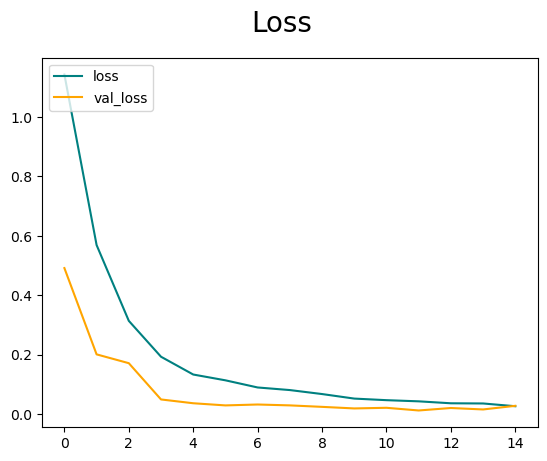

In [83]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

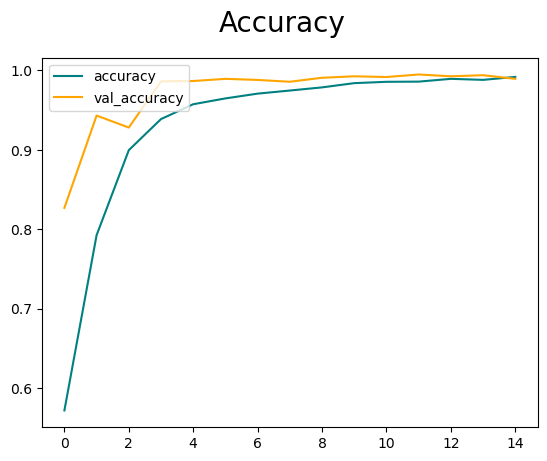

In [85]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [89]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [93]:
for batch in data_test.as_numpy_iterator():
    X, y = batch  # y é o vetor de rótulos com 32 categorias
    yhat = model.predict(X)  # yhat é um array de forma (32, 8), com as previsões de probabilidade
    
    # Converte as probabilidades para rótulos pegando o índice da maior probabilidade
    yhat_labels = tf.argmax(yhat, axis=1)  # yhat_labels será um vetor de rótulos, assim como y
    
    # Agora, atualize as métricas usando y e yhat_labels, que possuem a mesma forma
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

In [94]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9946581125259399, Recall:0.9946581125259399, Accuracy:0.9986645579338074


Interpretação dos valores no segundo teste pelo GPT: 

* Precision: 0.99
* Recall:1.0
* Accuracy:0.24

**Precision (Precisão): 0.9960 ou 99.6%**

* Precisão mede a proporção de previsões corretas dentre as que foram previstas como positivas. Ou seja, dentre todas as instâncias que o modelo classificou como pertencendo a uma determinada classe, 99.6% eram de fato corretas.
Uma precisão alta indica que quando o modelo prediz uma classe, ele geralmente está correto, mas não necessariamente está capturando todas as instâncias dessa classe (isso depende do recall).

**Recall (Revocação ou Sensibilidade): 1.0 ou 100%**

* Recall mede a proporção de instâncias corretas que foram detectadas em relação ao total de instâncias reais dessa classe. Um valor de 100% significa que o modelo detectou todas as instâncias positivas, ou seja, não deixou de prever nenhuma classe que deveria ter sido prevista.
Um recall de 1.0 é ótimo, pois indica que o modelo está capturando todas as amostras relevantes de cada classe.

**Accuracy (Acurácia): 0.2465 ou 24.65%**

* Acurácia mede a proporção total de previsões corretas (todas as classes) em relação ao número total de previsões feitas. Ou seja, o modelo acertou cerca de 24.65% de todas as previsões.
Apesar da alta precisão e recall, uma acurácia de 24.65% indica que o modelo está com um desempenho baixo em termos de prever a classe correta em geral.

**Interpretação combinada:**

* O alto recall e alta precisão sugerem que, para algumas classes específicas, o modelo está acertando quase tudo que prevê (ou seja, ele classifica com precisão), mas a baixa acurácia indica que o desempenho geral ainda é insatisfatório.
Isso pode acontecer, por exemplo, se o modelo estiver muito bom em prever uma ou algumas classes específicas, mas não estiver lidando bem com outras classes.
* Como você tem 8 categorias, talvez o modelo esteja se concentrando em uma classe majoritária, prevendo essa classe muito bem, mas não se saindo bem nas outras classes, o que derruba a acurácia geral.

Isso faz sentido com o comportamento observado para o segundo teste, onde os casos de 1 a 4 são quase sempre acertados e de 5 a 8, quase sempre ele erra

# 6. Testando o Modelo diretamente

## Reconhecendo uma imagem de categoria 1

In [193]:
import cv2

def showImage(path, category, model):
    img = cv2.imread(path)
    image = tf.image.resize(img, (256,256))
    image = tf.clip_by_value(image, 0.0, 255.0)
    image = tf.cast(image, tf.uint8)
    
    # Prever a classe da imagem
    yhat = model.predict(np.expand_dims(image / 255, 0))  
    predicted_class = np.argmax(yhat)  # A classe predita
    details = ""
    
    # Gerar as probabilidades para todas as classes
    for i, prediction in enumerate(yhat[0]):  
        details += f'Probability of Class {i + 1}: {prediction * 100:.2f}%\n'
    
    # Converter a imagem de BGR para RGB
    rgb_img = cv2.cvtColor(image.numpy(), cv2.COLOR_BGR2RGB)
    
    # Criar a figura e os eixos
    fig, ax = plt.subplots(figsize=(8, 8))  # Ajuste o tamanho da figura (largura x altura)
    
    # Exibir a imagem
    ax.imshow(rgb_img)
    
    # Título com a categoria
    ax.set_title(f"Classe: {category}\nPrevisão: {predicted_class + 1}", fontsize=14)
    
    # Adicionar as probabilidades das classes como rodapé
    fig.text(0.5, -0.05, details, ha='center', fontsize=10, color='gray', va='bottom')
    
    # Ajustar o layout para evitar sobreposição
    plt.tight_layout(pad=8.0)  # Aumente o valor de 'pad' para mais espaçamento
    
    # Exibir a imagem
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


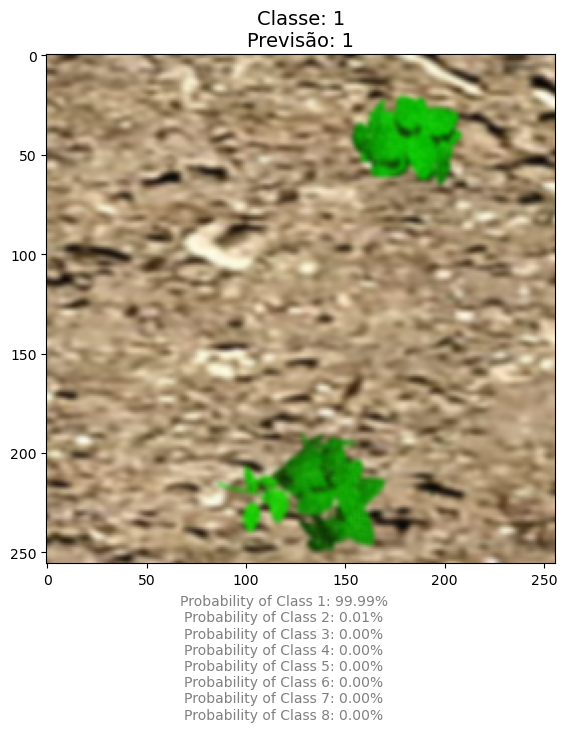

In [195]:
showImage('test/test_category1.png', '1', model)

## Reconhecendo uma imagem de categoria 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


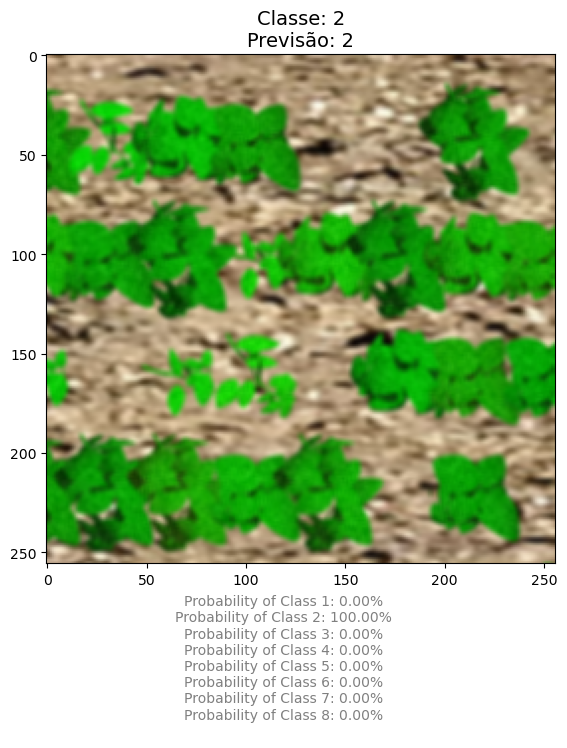

In [197]:
showImage('test/test_category2.png', '2', model)

## Reconhecendo uma imagem de categoria 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


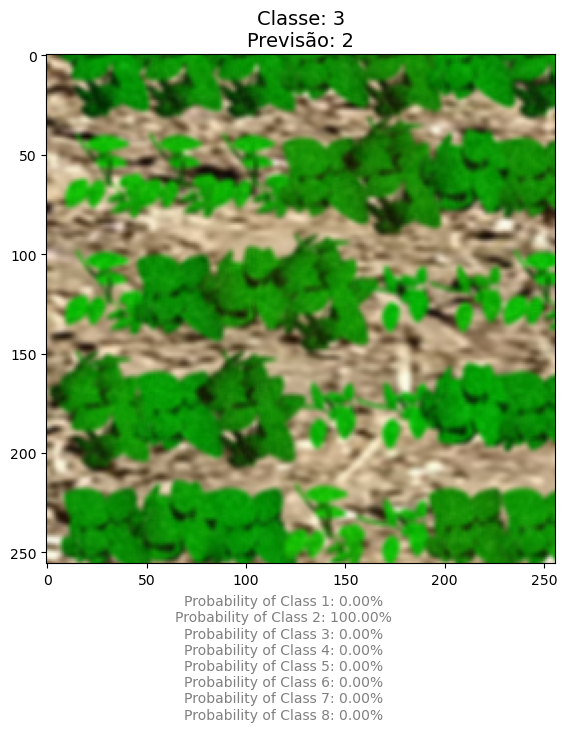

In [199]:
showImage('test/test_category3.png', '3', model)

## Reconhecendo uma imagem de categoria 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


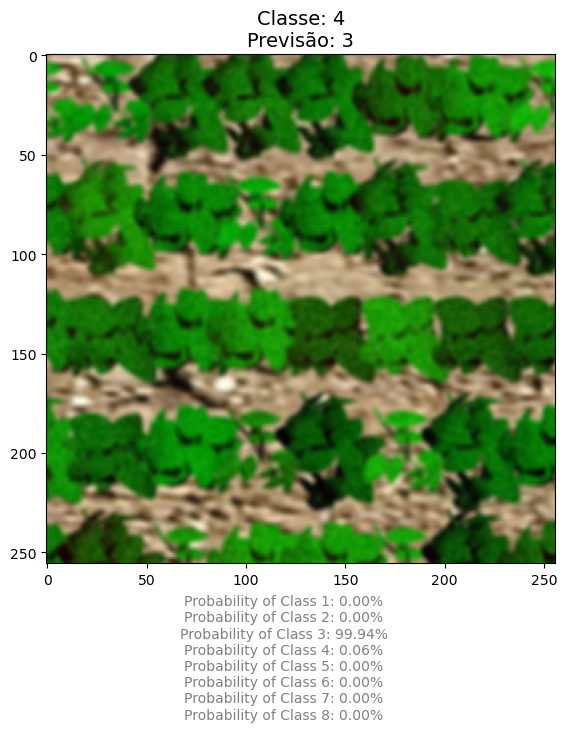

In [201]:
showImage('test/test_category4.png', '4', model)

## Reconhecendo uma imagem de categoria 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


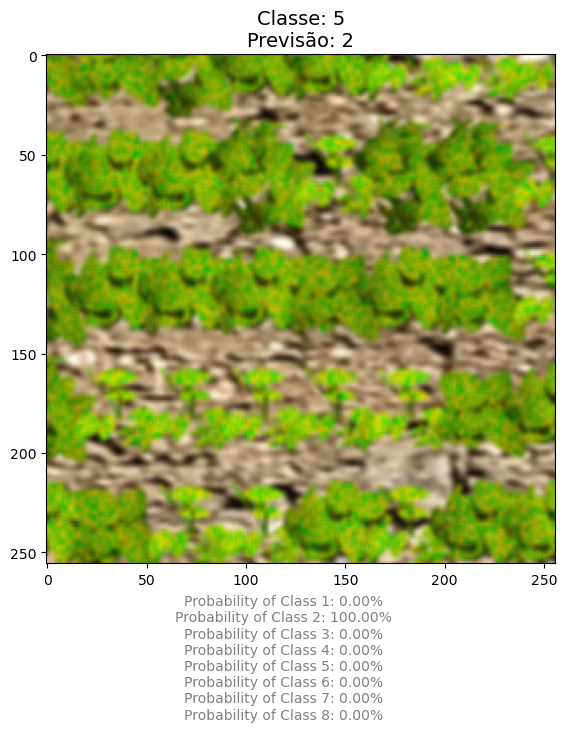

In [203]:
showImage('test/test_category5.png', '5', model)

## Reconhecendo uma imagem de categoria 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


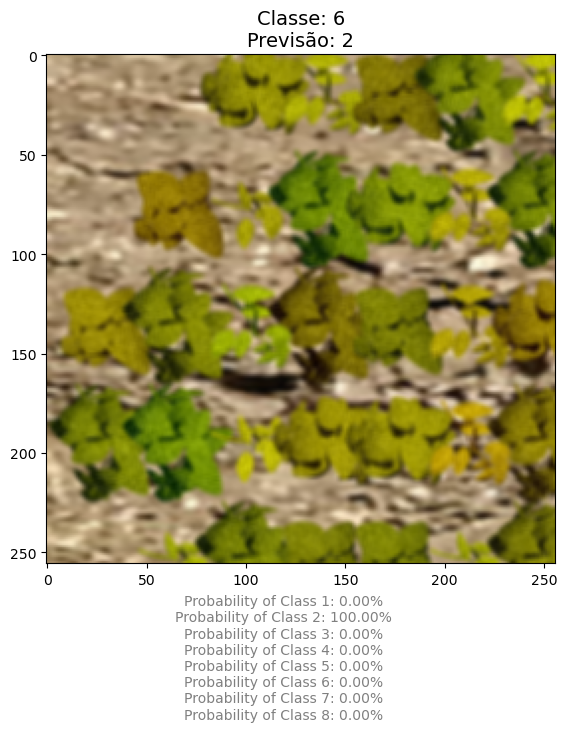

In [205]:
showImage('test/test_category6.png', '6', model)

## Reconhecendo uma imagem de categoria 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


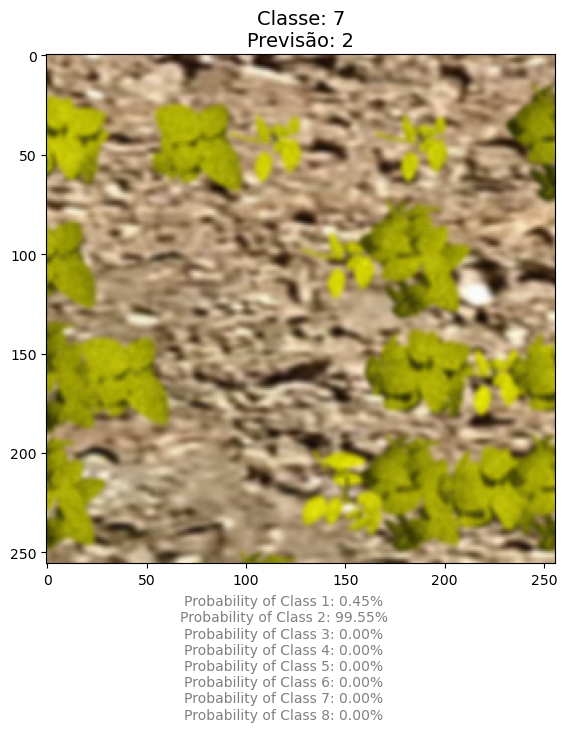

In [207]:
showImage('test/test_category7.png', '7', model)

## Reconhecendo uma imagem de categoria 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


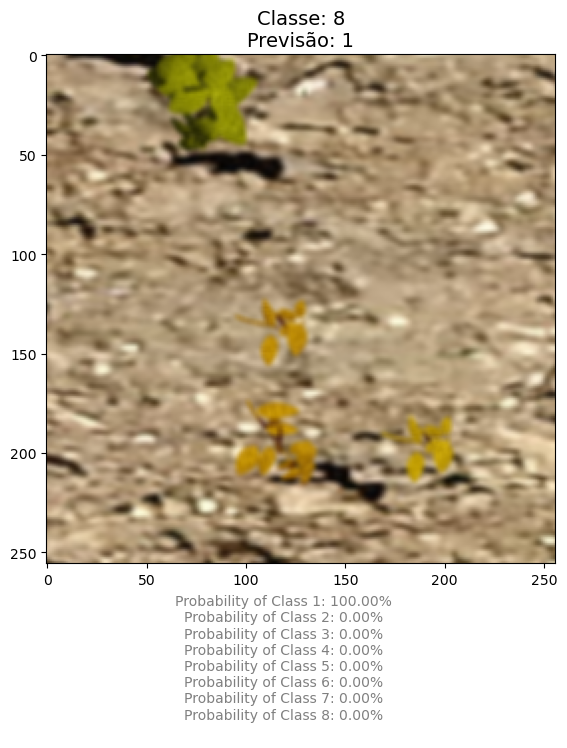

In [209]:
showImage('test/test_category8.png', '8', model)

# 7. Salvando o modelo

In [211]:
from tensorflow.keras.models import load_model

In [213]:
model.save(os.path.join('models','SoyField5.h5'))

In [214]:
model.save('models/SoyField5.keras')

In [ ]:
model = load_model(os.path.join('models', 'SoyField2.keras'))